In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

In [121]:
df23 = pd.read_csv('GrenlandRA_CTD_2023.csv', parse_dates=['onlydate'])

In [123]:
df22 = pd.read_excel('Grenland_CTD_work_2022.xlsx', sheet_name='Tabell')
df22 = df22[~df22['station'].isin(['BC-1', '105_', 'BC-3','BC-2', 'BC-5', 'BC-4'])]
df22['station'] = df22['station'].replace('VT67', 'V-2')
df22['depth'] = -df22['depth']
df22['latitude'] = np.nan
df22['longitude'] = np.nan

In [127]:
df22

,station,onlydate,depth,Salinity,Temp,Oks.(ml/L),OxygenSat,ChlaFluorescence,Turb.(FNU),Instrument,latitude,longitude
25,F-1.1,2022-02-16 10:36:18.691,0,3.244,3.463,7.736,84.96,NaN,3.463,Seabird CTD,59.11896,9.604295
26,F-1.1,2022-02-16 10:36:23.270,-1,3.565,3.636,8.207,90.75,NaN,4.634,Seabird CTD,59.11896,9.604295
27,F-1.1,2022-02-16 10:36:24.912,-2,3.895,3.789,8.109,90.23,NaN,4.731,Seabird CTD,59.11896,9.604295
28,F-1.1,2022-02-16 10:36:26.467,-3,5.965,3.901,7.973,90.21,NaN,4.211,Seabird CTD,59.11896,9.604295
29,F-1.1,2022-02-16 10:36:28.022,-4,14.845,5.335,7.232,89.71,NaN,2.807,Seabird CTD,59.11896,9.604295
...,...,...,...,...,...,...,...,...,...,...,...,...
1885,F-1.1,2022-12-02 11:24:04.838,-31,31.805,12.173,4.490,72.95,0.077,1.191,Seabird CTD,59.11896,9.604295
1886,F-1.1,2022-12-02 11:24:12.269,-35,32.832,11.101,3.992,63.83,0.073,1.279,Seabird CTD,59.11896,9.604295
1887,F-1.1,2022-12-02 11:24:21.946,-40,33.353,8.150,3.201,48.13,0.085,1.232,Seabird CTD,59.11896,9.604295
1888,F-1.1,2022-12-02 11:24:41.299,-50,33.368,6.931,2.645,38.68,0.095,1.563,Seabird CTD,59.11896,9.604295


In [124]:
station_coordinates = {
    'E-1.1': {'latitude': 59.078583, 'longitude': 9.700707},
    'F-1.1': {'latitude': 59.11896, 'longitude': 9.604295},
    'F7': {'latitude': 59.06668, 'longitude': 9.709516},
    'V01': {'latitude': 59.0211, 'longitude': 9.7482},
    'V02': {'latitude': 59.0155, 'longitude': 9.7567},
    'V-2': {'latitude': 59.03908, 'longitude': 9.72323}
}

# Map station names to latitude and longitude
df22['latitude'] = df22['station'].map(lambda x: station_coordinates[x]['latitude'])
df22['longitude'] = df22['station'].map(lambda x: station_coordinates[x]['longitude'])

In [128]:
melt_df22 = pd.melt(df22, id_vars=['station', 'onlydate', 'depth', 'latitude', 'longitude'],
                    var_name='variablecode', value_name='value')

In [129]:
df = pd.concat([melt_df22, df23])

In [130]:
df

,station,onlydate,depth,latitude,longitude,variablecode,value,valuedatetime,month
0,F-1.1,2022-02-16 10:36:18.691,0.0,59.11896,9.604295,Salinity,3.244,NaN,NaN
1,F-1.1,2022-02-16 10:36:23.270,-1.0,59.11896,9.604295,Salinity,3.565,NaN,NaN
2,F-1.1,2022-02-16 10:36:24.912,-2.0,59.11896,9.604295,Salinity,3.895,NaN,NaN
3,F-1.1,2022-02-16 10:36:26.467,-3.0,59.11896,9.604295,Salinity,5.965,NaN,NaN
4,F-1.1,2022-02-16 10:36:28.022,-4.0,59.11896,9.604295,Salinity,14.845,NaN,NaN
...,...,...,...,...,...,...,...,...,...
41096,V-2,2023-04-21 00:00:00.000,-100.0,59.03908,9.723230,Press,100.968685,2023-04-21 08:47:22.286043,4.0
41097,V-2,2023-04-21 00:00:00.000,-101.0,59.03908,9.723230,Press,101.978622,2023-04-21 08:47:25.033633,4.0
41098,V-2,2023-04-21 00:00:00.000,-102.0,59.03908,9.723230,Press,102.988563,2023-04-21 08:47:27.606656,4.0
41099,V-2,2023-04-21 00:00:00.000,-103.0,59.03908,9.723230,Press,103.998509,2023-04-21 08:47:30.767491,4.0


In [131]:
# Group the DataFrame by the 'date' column
grouped_by_st = df.groupby('station')

# Create a dictionary to store the split DataFrames
split_dataframes = {}

# Iterate over unique dates and create DataFrames
for date, group in grouped_by_st:
    split_dataframes[date] = group.reset_index(drop=True)

In [132]:
split_dataframes.keys()

dict_keys(['E-1.1', 'F-1.1', 'F7', 'V-2', 'V01', 'V02'])

In [133]:
dfe11 = split_dataframes['E-1.1']

In [134]:
dfe11['variablecode'].unique()

array(['Salinity', 'Temp', 'Oks.(ml/L)', 'OxygenSat', 'ChlaFluorescence',
       'Turb.(FNU)', 'Instrument', 'SigmaDensity', 'Turbidity', 'Press',
       'CondValue', 'SoundVel', 'OxygenCon', 'ProbeVel'], dtype=object)

In [138]:
vdict = {
    'Temp': {'cmap': 'RdYlBu_r', 'title': 'Temperatur (grad C)'},
    'Salinity': {'cmap': 'viridis', 'title': 'Salinitet (PSU)'},
    'ChlaFluorescence': {'cmap': 'YlGn', 'title': 'Klorofyll fluorescens (mg/L)'},
    'OxygenSat': {'cmap': 'Spectral', 'title': 'Oksygenmetning (%)'}
}

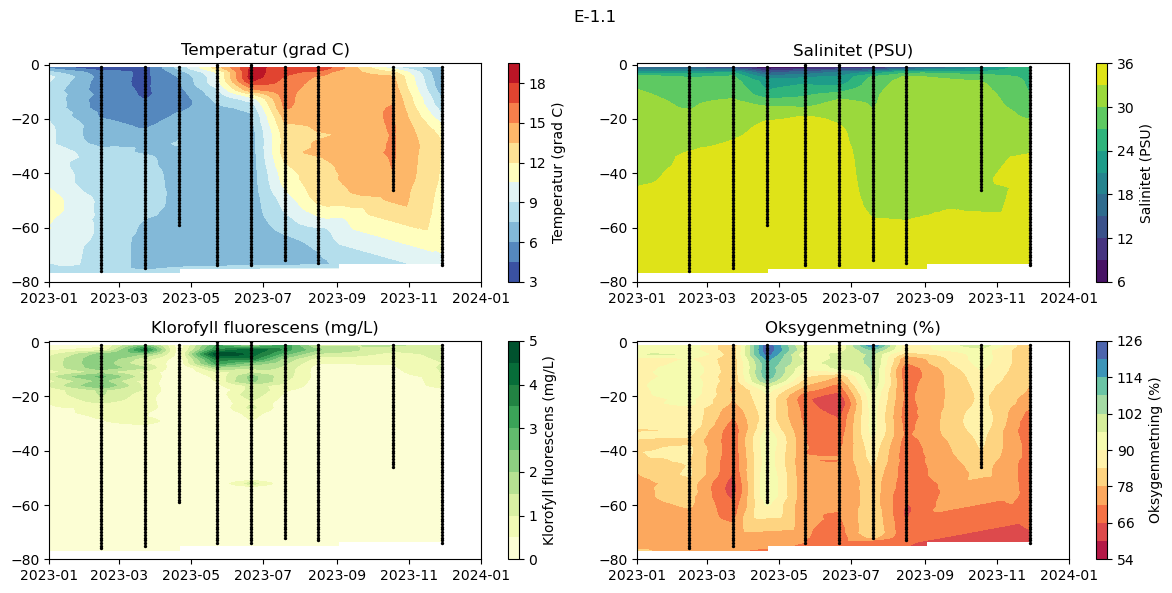

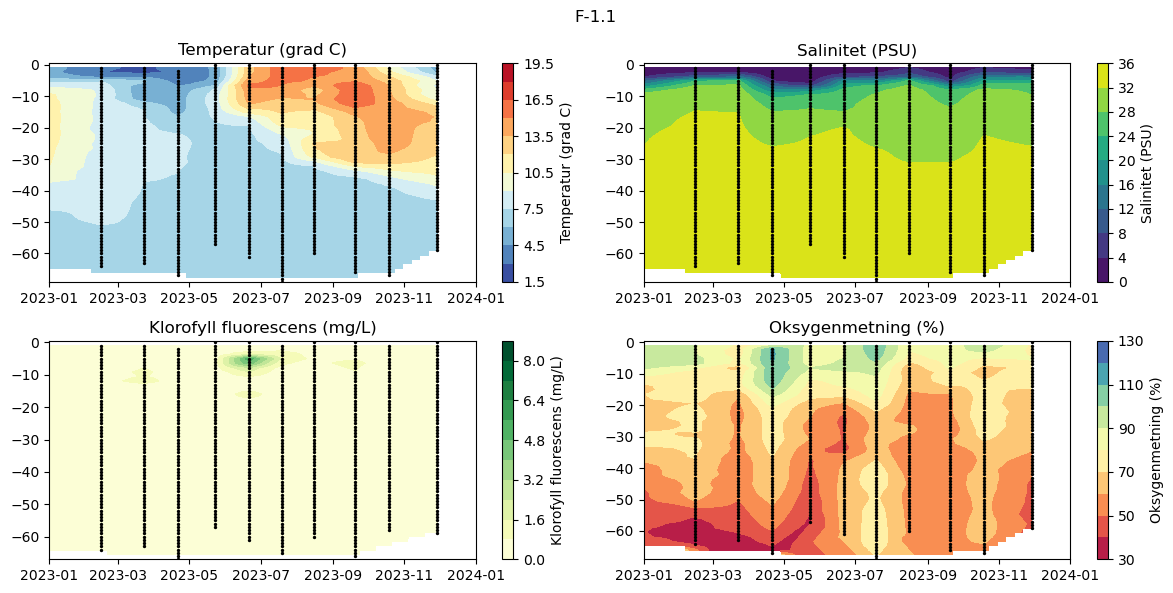

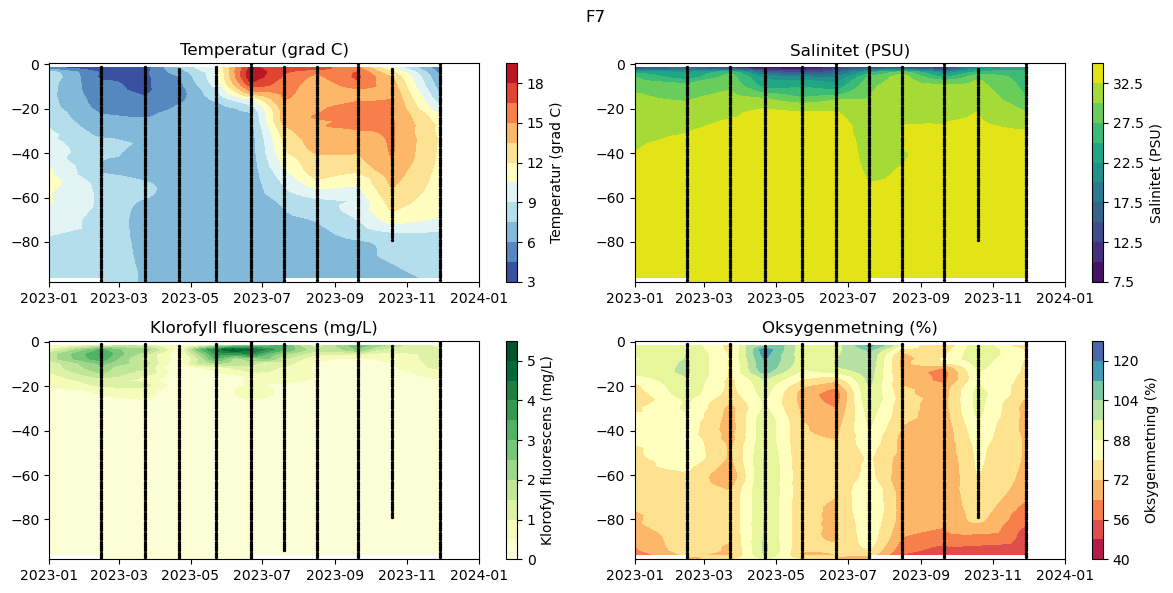

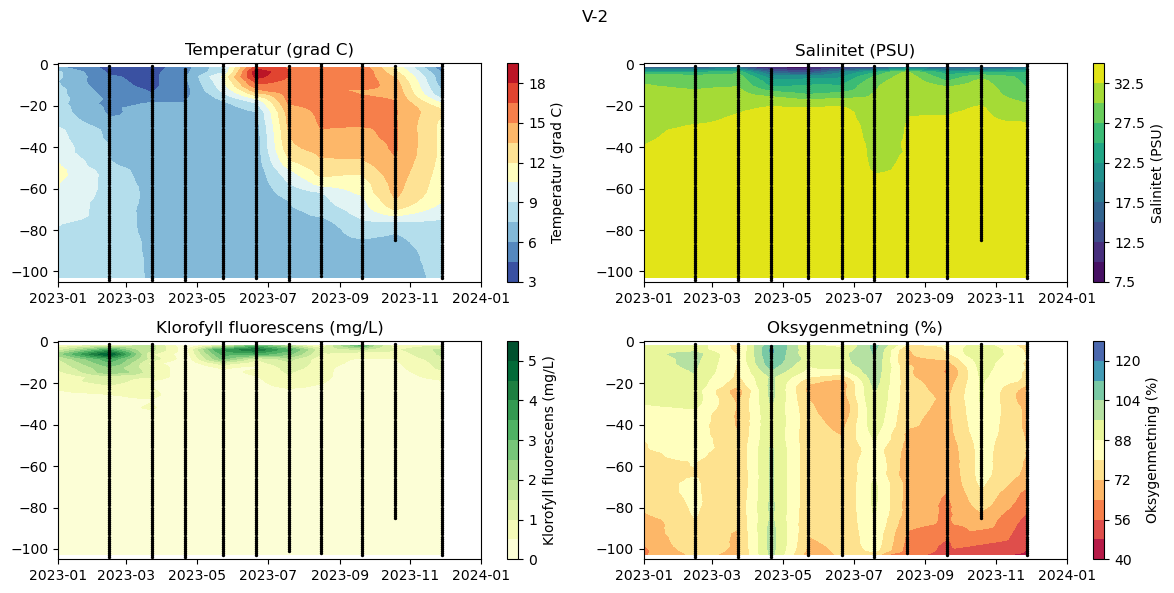

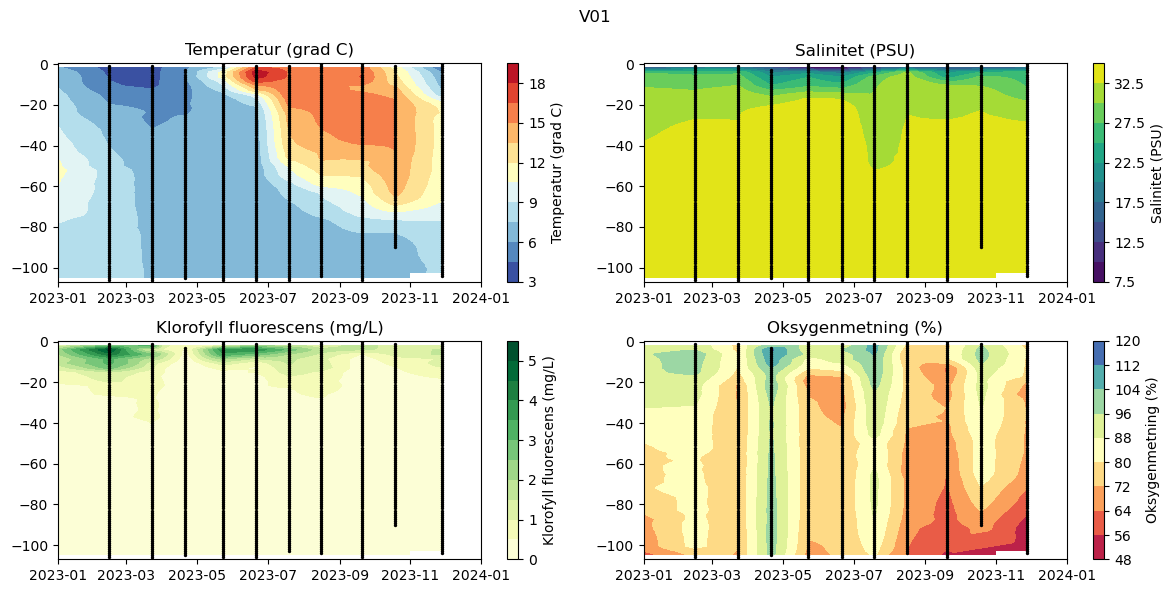

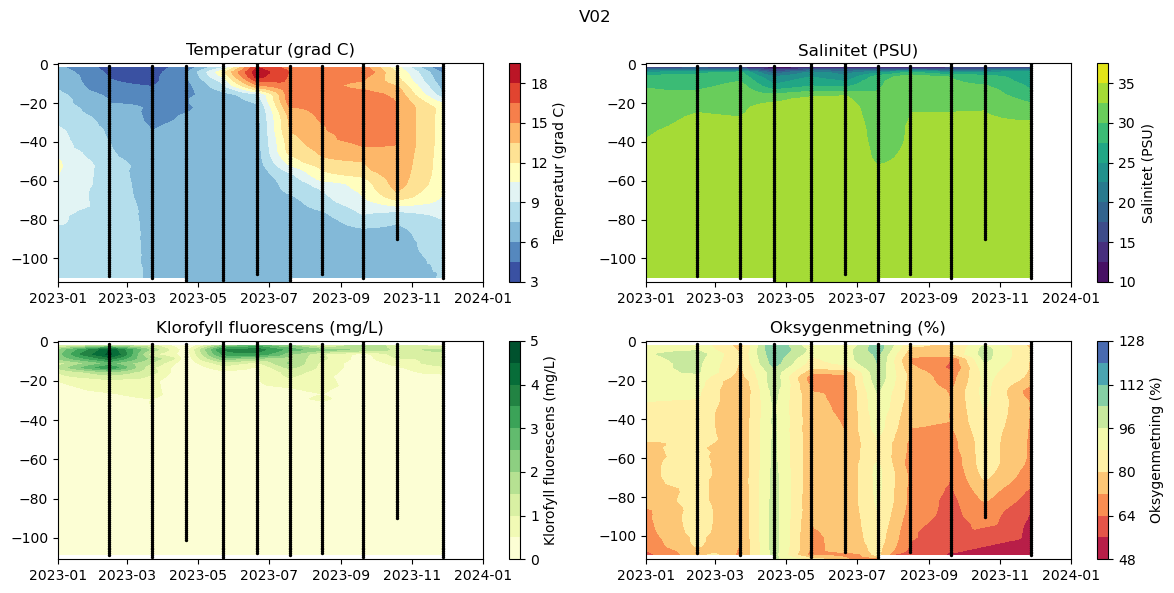

In [141]:
for st, split_df in split_dataframes.items():
    
    ## PLOT ##
    fig, axs = plt.subplots(2,2,figsize=(12,6))

    # for each variable
    for i, name in enumerate(vdict.keys()):
        ax = axs.ravel()[i]
        v = split_df[split_df['variablecode'] == name]

        # SORT!
        v = v.sort_values(by='onlydate').reset_index(drop=True)
        
        ## TIME ##
        # total time in hours from beginning
        tstart = v['onlydate'].iloc[0]
        v['tot_hours'] = (v['onlydate'] - tstart).dt.total_seconds()/60/60 
    
        # time with regular step
        ttot_reg = np.arange(0, v['tot_hours'].iloc[-1], 1) #  1 hour
    
        # create timesteps for plotting interpolated fields
        dates = pd.date_range(start=v['onlydate'].min(), freq='1H', periods=ttot_reg.shape[0])
    
        ## DEPTH ##
        depth_reg = np.linspace(0.5, v['depth'].min(), 50)
    
        # meshgrid
        ttotm, depthm = np.meshgrid(ttot_reg, depth_reg)

        try:
            vr = griddata((v['tot_hours'], v['depth']),  # x, y
                          v['value'],  # variable
                          (ttotm, depthm),  # Xreg, Yreg
                          method='linear')
        except ValueError:
            ax.remove()
            continue

        cf = ax.contourf(dates, depth_reg, vr, cmap=vdict[name]['cmap'], levels=10)
        sc = ax.scatter(v['onlydate'], v['depth'], s=2, c='k')

        ax.set_title(vdict[name]['title'])
        ax.set_xlim(pd.to_datetime('2023-01-01'), pd.to_datetime('2024-01-01'))

        cbar = plt.colorbar(cf, label=vdict[name]['title'])
        
    fig.suptitle(st)
    fig.tight_layout()
    plt.savefig(st + '.png', dpi=200, bbox_inches='tight')